In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
print(os.listdir("C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -25 Pathhole/Pothole"))

Using TensorFlow backend.
c:\users\e870859\anaconda3\envs\[virtual_env]\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\e870859\anaconda3\envs\[virtual_env]\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\e870859\anaconda3\envs\[virtual_env]\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\e870859\

['.ipynb_checkpoints', 'normal', 'Pathhole Detection- Categorical Crossentropy.ipynb', 'Pathhole Detection-Binary Crossentropy.ipynb', 'potholes']


In [3]:
Pothole_data = os.listdir(r'C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -25 Pathhole/Pothole/potholes/')
print(Pothole_data[:10])

Normal_data = os.listdir(r'C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -25 Pathhole/Pothole/normal/')
print('\n')
print(Normal_data[:10])

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


## Visualization

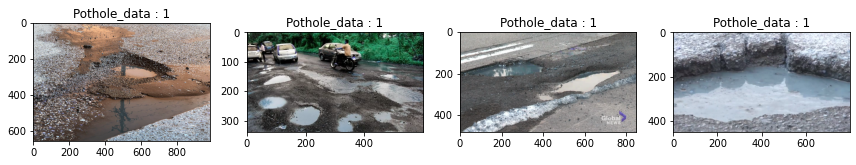

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -25 Pathhole/Pothole/potholes' + "/" + Pothole_data[i])
    plt.imshow(img)
    plt.title('Pothole_data : 1')
    plt.tight_layout()
plt.show()

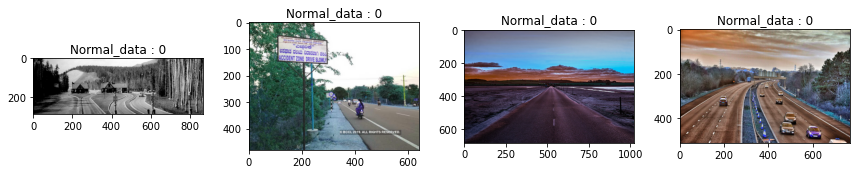

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -25 Pathhole/Pothole/normal' + "/" + Normal_data[i+1])
    plt.imshow(img)
    plt.title('Normal_data : 0')
    plt.tight_layout()
plt.show()

## Data Processing

In [6]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
def assign_label(img,label):
    return label

In [7]:
from tqdm import tqdm
X=[]
Z=[]
IMG_SIZE=128
Plain='C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -25 Pathhole/Pothole/normal'
Pothole='C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -25 Pathhole/Pothole/potholes'

make_train_data('Plain',Plain)
make_train_data('Pothole',Pothole)

100%|████████████████████████████████████████████████████████████████████████████████| 329/329 [00:15<00:00, 21.25it/s]


In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random as rn

le=LabelEncoder()
Y=le.fit_transform(Z)
X=np.array(X)

In [9]:
### Data Shufling
idx = np.arange(X.shape[0])
np.random.shuffle(idx)
X = X[idx]
Y = Y[idx]

In [10]:
Y=to_categorical(Y,2)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=101)

np.random.seed(42)
rn.seed(42)

In [12]:
x_train.shape

(510, 128, 128, 3)

## Modeling

In [13]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [14]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [16]:
data_gen = ImageDataGenerator(rescale=1./255,width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

In [17]:
data_gen.fit(x_train)

In [18]:
from keras.callbacks import ReduceLROnPlateau
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]

In [ ]:
batch_size=60

history = model.fit_generator(data_gen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=50, verbose=2,callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 9s - loss: 1.1577 - acc: 0.5125
Epoch 2/50
 - 7s - loss: 0.6785 - acc: 0.5604
Epoch 3/50
 - 7s - loss: 0.6529 - acc: 0.6435
Epoch 4/50
 - 6s - loss: 0.5673 - acc: 0.7573
Epoch 5/50
 - 6s - loss: 0.5699 - acc: 0.7091
Epoch 6/50
 - 6s - loss: 0.4417 - acc: 0.8215
Epoch 7/50
 - 6s - loss: 0.3996 - acc: 0.8199
Epoch 8/50
 - 7s - loss: 0.4810 - acc: 0.7823
Epoch 9/50
 - 6s - loss: 0.3515 - acc: 0.8643
Epoch 10/50
 - 7s - loss: 0.4288 - acc: 0.8125
Epoch 11/50
 - 7s - loss: 0.3187 - acc: 0.8848
Epoch 12/50


## Evalution

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
# Plot the loss curve for training
plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Plot the accuracy curve for training
plt.plot(history.history['acc'], color='g', label="Train Accuracy")
plt.title("Train Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
print('Train accuracy of the model: ',history.history['acc'][-1])

In [ ]:
print('Train loss of the model: ',history.history['loss'][-1])

## Prediction

In [ ]:
predictions = model.predict(np.array(x_test), verbose=1)

In [ ]:
predictions

In [ ]:
# import numpy as np 
# predictions.to_csv('submission_3.csv', index=False)